# **Dataset description**

**ML Data Cleaning and Feature Selection**

**Dataset** - [Superstore Dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final/code?datasetId=1940216&sortBy=voteCount)

**Context**

With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.


**Metadata**

Row ID => Unique ID for each row.
Order ID => Unique Order ID for each Customer.

Order Date => Order Date of the product.

Ship Date => Shipping Date of the Product.

Ship Mode=> Shipping Mode specified by the Customer.

Customer ID => Unique ID to identify each Customer.

Customer Name => Name of the Customer.
Segment => The segment where the Customer
belongs.

Country => Country of residence of the Customer.

City => City of residence of of the Customer.

State => State of residence of the Customer.

Postal Code => Postal Code of every Customer.

Region => Region where the Customer belong.

Product ID => Unique ID of the Product.

Category => Category of the product ordered.

Sub-Category => Sub-Category of the product ordered.

Product Name => Name of the Product

Sales => Sales of the Product.

Quantity => Quantity of the Product.

Discount => Discount provided.

Profit => Profit/Loss incurred.

***The project aims to answer below questions:***
* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

# <b>Installation of libraries</b>


In [64]:
!pip install pandas

In [65]:
!pip install matplotlib

In [66]:
!pip install plotly

In [67]:
!pip install seaborn

In [68]:
!pip install scipy

# <b>Importing libraries</b>
- **For ML Models**: sklearn, scipy
- **For Data Manipulation**: pandas, sklearn
- **For Data Visualization**: plotly, matplotlib, seaborn

In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import Lasso

from scipy.stats import chi2_contingency
from scipy.stats import norm
from scipy.stats import skew
import scipy.stats as stats
from scipy.stats import kruskal

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


#**Reading & Cleaning data**

In [70]:
# Reading data from CSV
superstore_df = pd.read_csv("https://raw.githubusercontent.com/muskan-northeastern/SuperStore_DataScience_project/main/Superstore.csv", encoding='windows-1252')

In [71]:
# Dropping irrelevant columns
superstore_df.drop(['Row ID','Order ID', 'Segment', 'Ship Date', 'Customer ID', 'Customer Name', 'Country', 'Postal Code', 'Product ID','Product Name'], axis=1, inplace=True)

In [72]:
#Renaming columns
superstore_df.rename(columns={'Order Date':'OrderDate','Ship Mode':'ShipMode', 'Sub-Category':'SubCategory'}, inplace=True)

In [73]:
# Basic statistics
superstore_df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# **1. What are the data types? (Only numeric and categorical)**

In [74]:
# What are the data types? (Only numeric and categorical)
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderDate    9994 non-null   object 
 1   ShipMode     9994 non-null   object 
 2   City         9994 non-null   object 
 3   State        9994 non-null   object 
 4   Region       9994 non-null   object 
 5   Category     9994 non-null   object 
 6   SubCategory  9994 non-null   object 
 7   Sales        9994 non-null   float64
 8   Quantity     9994 non-null   int64  
 9   Discount     9994 non-null   float64
 10  Profit       9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


**Conclusion derived**

Dataset has ***7*** Categorical data columns and ***4*** numerical data columns.

***Categorical data columns:*** OrderDate, ShipMode, City, State, Region, Category, SubCategory

***Numerical data columns:*** Sales, Quantity, Discount, Profit

#**2. Are there missing values?**

In [75]:
# Are there missing values?
superstore_df.isna().sum()

OrderDate      0
ShipMode       0
City           0
State          0
Region         0
Category       0
SubCategory    0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64

**Conclusion derived**

There are *no missing values* in the dataset.Hence, we do not need to impute null values

# **3. What are the likely distributions of the numeric variables?**

***Numerical data columns:*** Sales, Quantity, Discount, Profit

In [76]:
# Plot distribution of the Numerical columns
sales = go.Box(x=superstore_df['Sales'],name='Sales')
Quantity = go.Box(x=superstore_df['Quantity'],name='Quantity')
Discount = go.Box(x=superstore_df['Discount'],name='Discount')
Profit = go.Box(x=superstore_df['Profit'],name='Profit')

fig = make_subplots(rows=2, cols=2)
fig.append_trace(sales, row = 1, col = 1)
fig.append_trace(Quantity, row = 1, col = 2)
fig.append_trace(Discount, row = 2, col = 1)
fig.append_trace(Profit, row = 2, col = 2)

fig.update_layout(
    title_text = 'Distribution of the numerical data',
    title_font_size = 24,
    title_x=0.45)

fig.show()

**Observation:** "Sales" and "Profit" have highest number of outliers.

### Dealing with outliers

In [77]:
outlier_df = superstore_df.copy()

In [78]:
superstore_df.drop(superstore_df[(superstore_df['Sales'] > 3000)].index, inplace=True)
superstore_df.drop(superstore_df[(superstore_df['Profit'] > 1500) | (superstore_df['Profit'] < -400)].index, inplace=True)
superstore_df.drop(superstore_df[(superstore_df['Discount'] >= 0.6)].index, inplace=True)
superstore_df.drop(superstore_df[(superstore_df['Quantity'] > 11)].index, inplace=True)

In [79]:
# Plot distribution of the Numerical columns
sales = go.Box(x=superstore_df['Sales'],name='Sales')
Quantity = go.Box(x=superstore_df['Quantity'],name='Quantity')
Discount = go.Box(x=superstore_df['Discount'],name='Discount')
Profit = go.Box(x=superstore_df['Profit'],name='Profit')

fig = make_subplots(rows=2, cols=2)
fig.append_trace(sales, row = 1, col = 1)
fig.append_trace(Quantity, row = 1, col = 2)
fig.append_trace(Discount, row = 2, col = 1)
fig.append_trace(Profit, row = 2, col = 2)

fig.update_layout(
    title_text = 'Distribution of the numerical data after removing outliers.',
    title_font_size = 24,
    title_x=0.45)

fig.show()

### Distribution and Log transformation

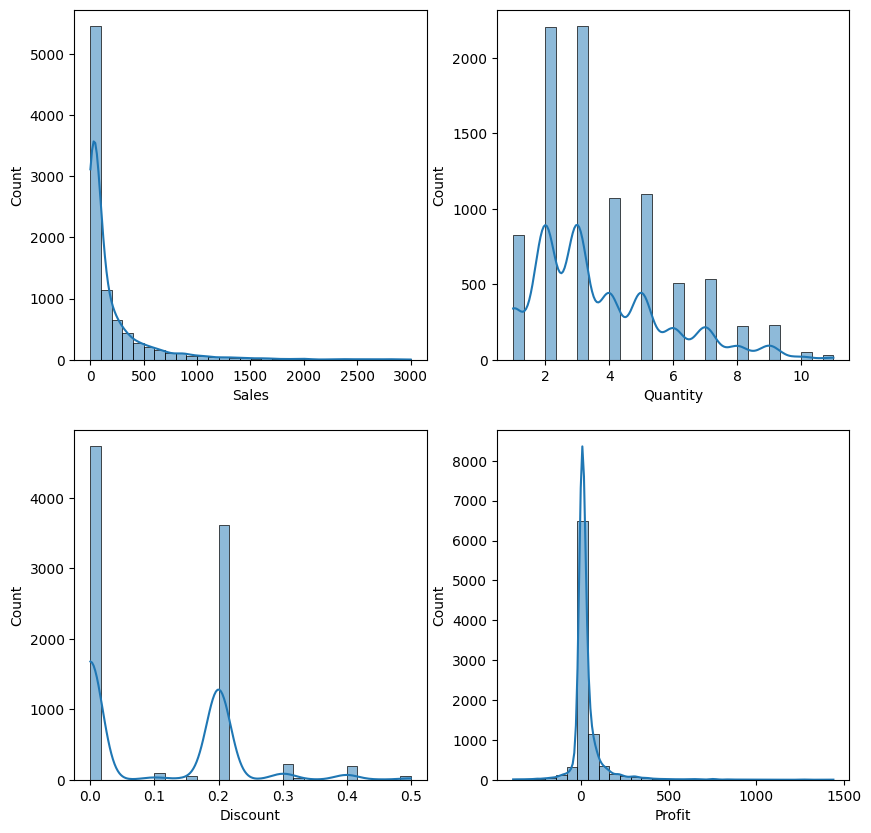

In [80]:
plt.subplot(221)
sns.histplot(superstore_df, x="Sales", bins=30,kde=True)

plt.subplot(222)
sns.histplot(superstore_df, x="Quantity", bins=30,kde=True)

plt.subplot(223)
sns.histplot(superstore_df, x="Discount", bins=30,kde=True)

plt.subplot(224)
sns.histplot(superstore_df, x="Profit", bins=30,kde=True)
fig = plt.gcf()
fig.set_size_inches(10,10)

Since the Numerical data columns are NOT normally distributed, we use log transformation to reduce skewness of the dataset.

It will help to make the data more symmetric and to stabilize variance.

In [81]:
superstore_log_df = superstore_df.drop(['Sales','Profit','Quantity','Discount'],axis=1)

Text(0.5, 1.0, 'Transformed Data (Skewness: 0.14)')

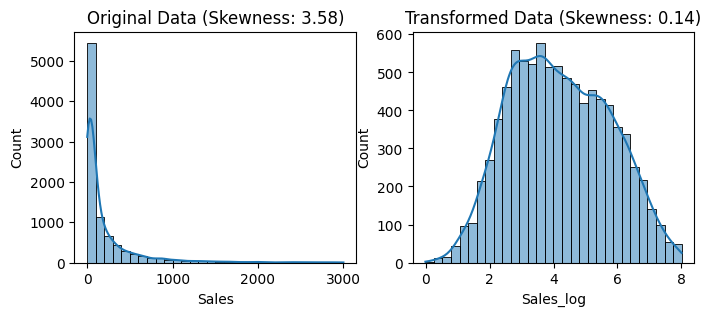

In [82]:
original_skewness = skew(superstore_df.Sales)

# Apply log transformation
superstore_log_df['Sales_log'] = np.log(superstore_df.Sales)

# Calculate skewness of the transformed data
transformed_skewness = skew(superstore_log_df['Sales_log'])

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.histplot(superstore_df.Sales, bins=30, kde=True)
plt.title(f'Original Data (Skewness: {original_skewness:.2f})')

plt.subplot(1, 2, 2)
sns.histplot(superstore_log_df.Sales_log, bins=30, kde=True)
plt.title(f'Transformed Data (Skewness: {transformed_skewness:.2f})')

Text(0.5, 1.0, 'Transformed Data (Skewness: 0.12)')

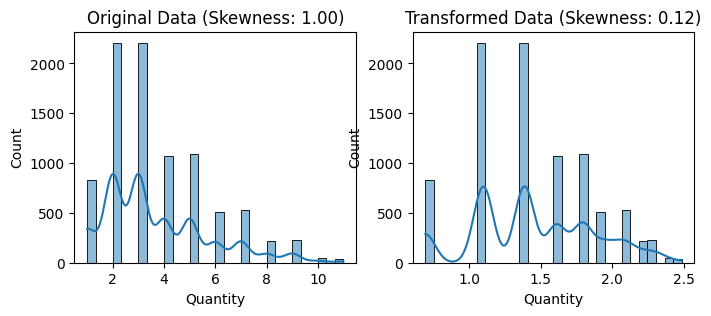

In [83]:
original_skewness = skew(superstore_df.Quantity)

# Apply log transformation
transformed_data = np.log(superstore_df.Quantity+1)
superstore_log_df['Quantity_log'] = np.log(superstore_df.Quantity+1)

# Calculate skewness of the transformed data
transformed_skewness = skew(transformed_data)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.histplot(superstore_df.Quantity, bins=30, kde=True)
plt.title(f'Original Data (Skewness: {original_skewness:.2f})')

plt.subplot(1, 2, 2)
sns.histplot(transformed_data, bins=30, kde=True)
plt.title(f'Transformed Data (Skewness: {transformed_skewness:.2f})')

Text(0.5, 1.0, 'Transformed Data (Skewness: 0.50)')

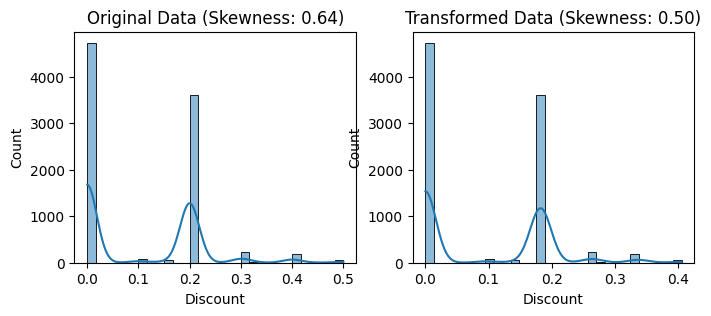

In [84]:
original_skewness = skew(superstore_df.Discount)

# Apply log transformation
transformed_data = np.log(superstore_df.Discount+1)
superstore_log_df['Discount_log'] = np.log(superstore_df.Discount+1)

# Calculate skewness of the transformed data
transformed_skewness = skew(transformed_data)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.histplot(superstore_df.Discount, bins=30, kde=True)
plt.title(f'Original Data (Skewness: {original_skewness:.2f})')

plt.subplot(1, 2, 2)
sns.histplot(transformed_data, bins=30, kde=True)
plt.title(f'Transformed Data (Skewness: {transformed_skewness:.2f})')

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log



Text(0.5, 1.0, 'Transformed Data (Skewness: nan)')

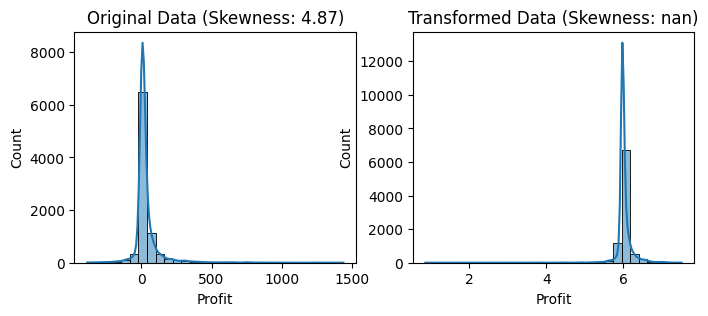

In [85]:
original_skewness = skew(superstore_df.Profit)

# Apply log transformation
transformed_data = np.log(superstore_df.Profit + abs(superstore_df.Profit.min()+1))
superstore_log_df['Profit_log'] = np.log(superstore_df.Profit + abs(superstore_df.Profit.min()+1))

# Calculate skewness of the transformed data
transformed_skewness = skew(transformed_data)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.histplot(superstore_df.Profit, bins=30, kde=True)
plt.title(f'Original Data (Skewness: {original_skewness:.2f})')

plt.subplot(1, 2, 2)
sns.histplot(transformed_data, bins=30, kde=True)
plt.title(f'Transformed Data (Skewness: {transformed_skewness:.2f})')

**Conclusion derived**

Before log transformation:

* The Distribution of Sales is extremely right skewed.

* The Distribution of Profit is Normally distributed with very low value of standard deviation.

* The Distribution of Discount and Quantity is multimodal in nature.

After log transformation:
  
* The data is normally distributed with slight skew.

# **4. Which independent variables are useful to predict a target (dependent variable)?**

Three methods to predict target:
* **Univariate - SelectKBest**
* **L1 (Lasso) Regularization**
* **HeatMap**



### **Label encoding of Object dtype columns**

In [86]:
le = LabelEncoder()
encoded_df = superstore_df.copy()

for i in encoded_df.columns:
    if(encoded_df.dtypes[i] == 'object'):
        encoded_df[i] = le.fit_transform(encoded_df[i])

encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8985 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderDate    8985 non-null   int64  
 1   ShipMode     8985 non-null   int64  
 2   City         8985 non-null   int64  
 3   State        8985 non-null   int64  
 4   Region       8985 non-null   int64  
 5   Category     8985 non-null   int64  
 6   SubCategory  8985 non-null   int64  
 7   Sales        8985 non-null   float64
 8   Quantity     8985 non-null   int64  
 9   Discount     8985 non-null   float64
 10  Profit       8985 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 842.3 KB


## **Univariate - SelectKBest**

In [87]:
encoded_df.columns

Index(['OrderDate', 'ShipMode', 'City', 'State', 'Region', 'Category',
       'SubCategory', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [88]:
# Dividing data into numerical and categorical types
X_numerical = encoded_df[['Sales','Quantity','Discount']]
X_encoded=encoded_df[['ShipMode', 'City', 'State', 'Region','Category','SubCategory']]
items = ['Sales','Quantity','Discount','ShipMode', 'City', 'State', 'Region','Category','SubCategory']
X_final = np.hstack((X_numerical, X_encoded))

# SelectKBest for feature selection
for i in range(2,9):
  number_of_features = i
  selector = SelectKBest(score_func=f_regression, k=number_of_features)

  # Fit and transform the feature matrix to select the top k features
  X_new = selector.fit_transform(X_final, encoded_df['Profit'])

  selected_feature_indices = selector.get_support(indices=True)
  X_selected = X_final[:, selected_feature_indices]

  print([ items[t] for t in selected_feature_indices ])

['Sales', 'Discount']
['Sales', 'Quantity', 'Discount']
['Sales', 'Quantity', 'Discount', 'Category']
['Sales', 'Quantity', 'Discount', 'Category', 'SubCategory']
['Sales', 'Quantity', 'Discount', 'State', 'Category', 'SubCategory']
['Sales', 'Quantity', 'Discount', 'State', 'Region', 'Category', 'SubCategory']
['Sales', 'Quantity', 'Discount', 'ShipMode', 'State', 'Region', 'Category', 'SubCategory']


* Index 0 corresponds to the first column in X_final, which is 'Sales' column.
* Index 2 corresponds to the third column in X_final, which is 'Discount' column.

## **L1 (Lasso) Regularization**

Mean Squared Error: 4484.578103322017
Coefficients: [-4.31340887e-04 -7.57639684e-01 -2.01409136e-02  6.32654840e-02
 -2.91394604e-02  1.91894369e+01 -1.90544377e+00  1.82847923e-01
 -3.80056598e-01 -2.64488227e+02]
Index(['Discount', 'Category', 'SubCategory', 'ShipMode', 'Quantity', 'Sales',
       'State', 'Region', 'City', 'OrderDate'],
      dtype='object')


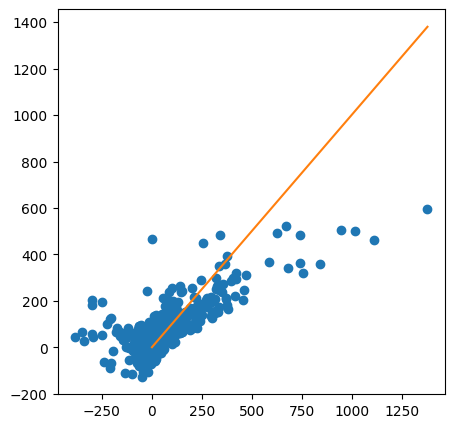

In [89]:
# Split the data into training and testing sets
X = encoded_df.drop(['Profit'] , axis = 1)
y = encoded_df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso regression model with alpha (the regularization strength)
alpha = 0.1  # You can adjust this hyperparameter
lasso_reg = Lasso(alpha=alpha)

# Fit the model to the training data
lasso_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_reg.predict(X_test)

# Calculate the Mean Squared Error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get the coefficients of the model
coefficients = lasso_reg.coef_

# Print the coefficients
print("Coefficients:", coefficients)
absolute_coefficients = abs(coefficients)
feature_ranking = pd.Series(absolute_coefficients, index=X.columns).sort_values(ascending=False)
num_top_features = 10  # Adjust as needed
top_features = feature_ranking.head(num_top_features).index
print(top_features)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()


* Based on the above coefficients we can observe that Discount and Category are most important features.
* We need to consider other feature selection method(s) to determine the best features.

## **Heatmap Technique**

In [90]:
# Calculate the correlation matrix
correlation_matrix = encoded_df.corr(numeric_only = True)

# Create the heatmap using Plotly Express
fig = px.imshow(
    correlation_matrix,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    color_continuous_scale='RdBu',
    text_auto=True
)

# Customize the layout
fig.update_layout(
    title='Feature Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features'
)

# Show the heatmap
fig.show()

From the above HeatMap, we can see very little Correlation between the features. but we can clearly see that sales and profit are dependent.

**Conclusions derived:**

* Based on the above 3 feature selection methods we can observe that there are 5 features that are slightly correlated to the target variable
* The rest of the features show negligible correlation with the target variable.

The selected features are: 'Sales', 'Quantity', 'Discount', 'Category', 'SubCategory'

# **5. Which independent variables have missing data? How much?**

**Conclusion derived**

There are *no missing values* in the dataset.Hence, we do not need to impute null values

# **6. Do the training and test sets have the same data?**

Ssince the dataset is divided in 80:20 proportions for training and testing respectively, the two sets have DIFFERENT data.

Train score:  0.8508611830313728
Test score:  0.821322517469231
Regression score: 0.821322517469231
Mean Squared Error: 1766.776644216481
Mean absolute error: 19.816227939560967
Root Mean Squared Error: 42.03304229075598


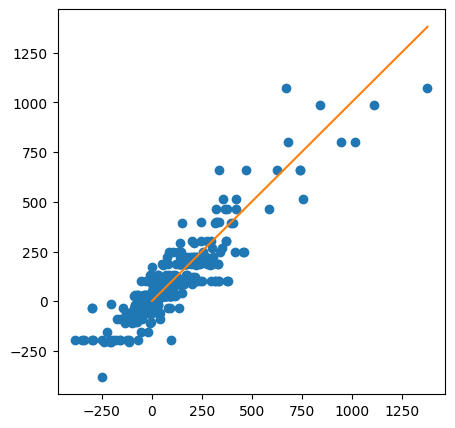

In [91]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

x = encoded_df[[ 'Sales', 'Quantity', 'Discount', 'Category', 'SubCategory']]
y = encoded_df['Profit'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

dt = DecisionTreeRegressor(max_depth= 6, max_features= 7, min_samples_split= 10, random_state= 2)
param_grid = {"max_depth": [3, None,6,9],
              "max_features": [5, 7,11, 15],
              "min_samples_split": [2, 3, 10],
             "random_state":[2,4,6]}
grid = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5)
grid_result = grid.fit(x_train, y_train)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error

print("Train score: ",dt.score(x_train,y_train))
print("Test score: ",dt.score(x_test , y_test))
print('Regression score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute error:', mae)
print('Root Mean Squared Error:', rmse)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()

**Conclusion derived**

Based on the DecisionTreeRegressor, the model can predict value with accuracy of 82.13%

# **7. Is the predictor variables independent of all the other predictor variables?**

* The significance of predictor variables being dependent or independent of each other is critical for model interpretability, performance, and reliability.
* Dependent predictor variables (multicollinearity) can lead to overfitting in regression models.
* When predictor variables are highly correlated, the model may assign undue importance to one variable over another, making the model less generalizable to new data.

## **Pair plot**

* Pair plots help to visualize pairwise relationships among predictor variables.
* This can help to identify clusters of variables that exhibit multicollinearity.

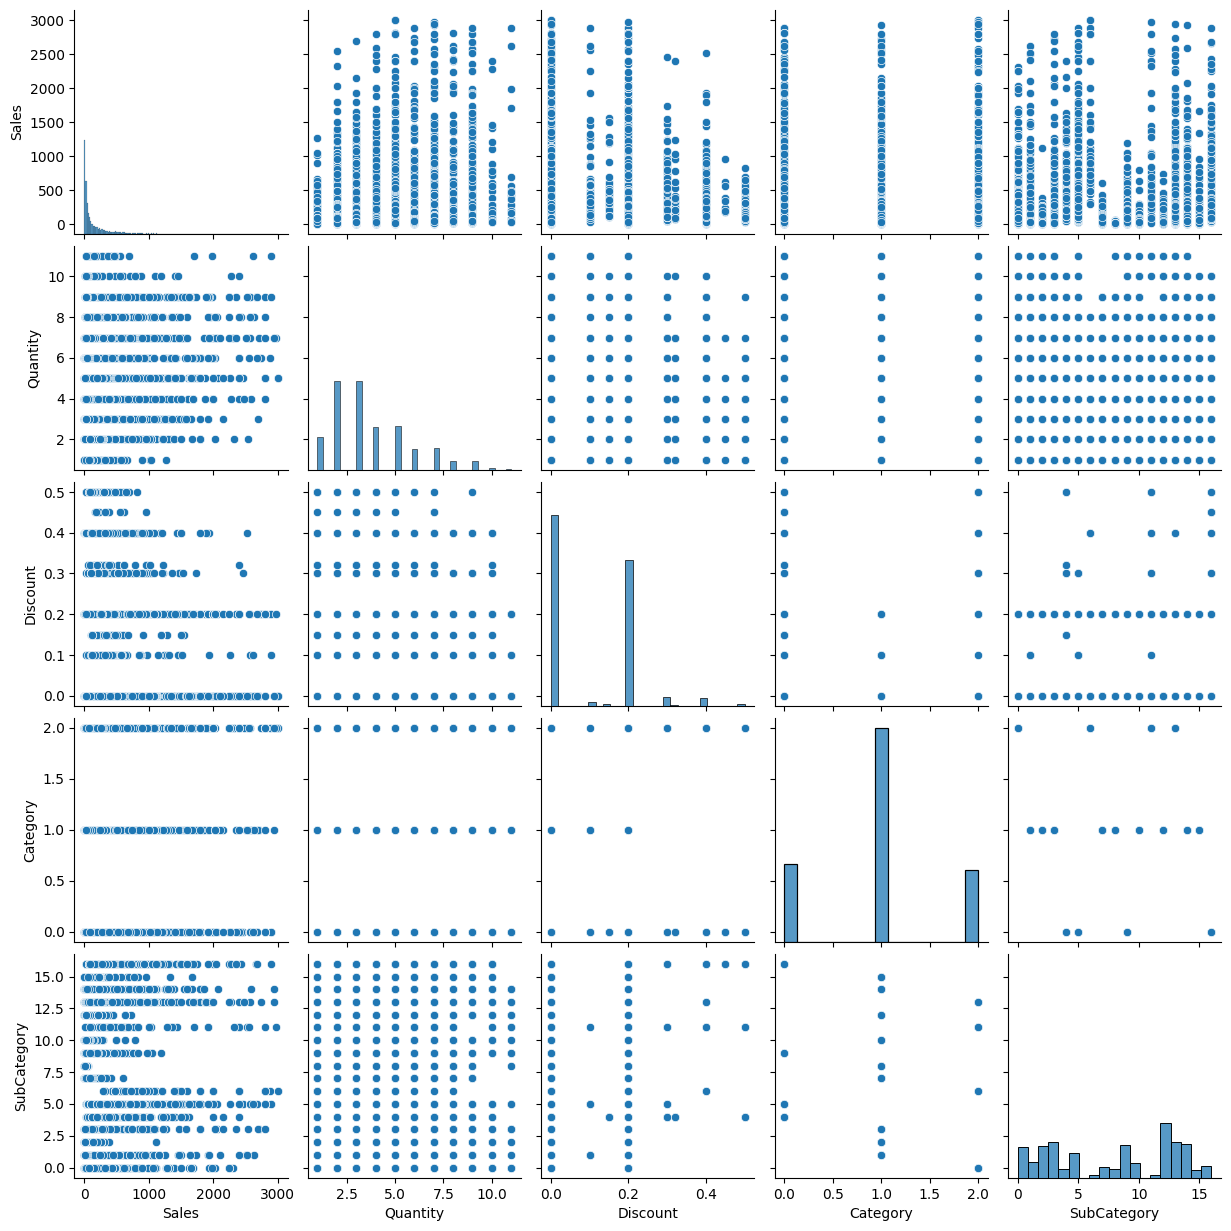

In [92]:
predictor_var_df = encoded_df[[ 'Sales', 'Quantity', 'Discount', 'Category', 'SubCategory']]
sns.pairplot(predictor_var_df)
plt.show()

**Conclusions derived**

* Observing the plots above, we can say that all the predictor variables are independent of each other.

# **8. Which predictor variables are the most important?**

The most important predictor variables are
* Sales
* Discount
* Quantity
* Category
* SubCategory

The finding were drawn using Feature selection methods.

# **9. Do the ranges of the predictor variables make sense?**

In [93]:
# Range of predictor variables
predictor_var=[ 'Sales', 'Quantity', 'Discount', 'Category', 'SubCategory']
for var in predictor_var:
  print(f"Range of {var}: {encoded_df[var].max() - encoded_df[var].min()}")

Range of Sales: 2998.96
Range of Quantity: 10
Range of Discount: 0.5
Range of Category: 2
Range of SubCategory: 16


**Conclusion derived:** The range of 'Sales' data is very high, this implies high variablity in it's distribution.

# **10. What are the distributions of the predictor variables?**

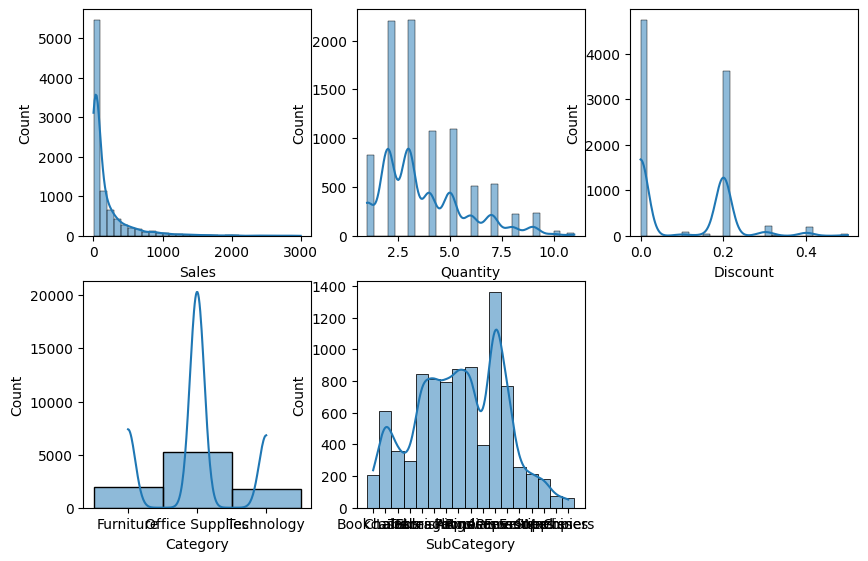

In [94]:
# Predictor variables:  'Sales', 'Quantity', 'Discount', 'Category', 'SubCategory'

plt.subplot(331)
sns.histplot(superstore_df, x="Sales", bins=30,kde=True)

plt.subplot(332)
sns.histplot(superstore_df, x="Quantity", bins=30,kde=True)

plt.subplot(333)
sns.histplot(superstore_df, x="Discount", bins=30,kde=True)

plt.subplot(334)
sns.histplot(superstore_df, x="Category", bins=30,kde=True)

plt.subplot(335)
sns.histplot(superstore_df, x="SubCategory", bins=30,kde=True)

fig = plt.gcf()
fig.set_size_inches(10,10)

**Conclusion derived**

* The Distribution of Sales is extremely right skewed.
* The Distribution of Discount and SubCategory is multimodal in nature.
* The distribution of Category is normally distributed.

# **11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

In [97]:
encoded_oulier_df = pd.read_csv("https://raw.githubusercontent.com/muskan-northeastern/SuperStore_DataScience_project/main/Superstore.csv", encoding='windows-1252')
encoded_oulier_df.drop(['Row ID','Order ID', 'Segment', 'Ship Date', 'Customer ID', 'Customer Name', 'Country', 'Postal Code', 'Product ID','Product Name'], axis=1, inplace=True)
encoded_oulier_df.rename(columns={'Order Date':'OrderDate','Ship Mode':'ShipMode', 'Sub-Category':'SubCategory'}, inplace=True)

le = LabelEncoder()
for i in encoded_oulier_df.columns:
    if(encoded_oulier_df.dtypes[i] == 'object'):
        encoded_oulier_df[i] = le.fit_transform(encoded_oulier_df[i])

Train score:  0.8559489539578098
Test score:  0.02807539469598197
Regression score: 0.02807539469598197
Mean Squared Error: 47123.88672072234
Mean absolute error: 43.93424727326318
Root Mean Squared Error: 217.08036926613687


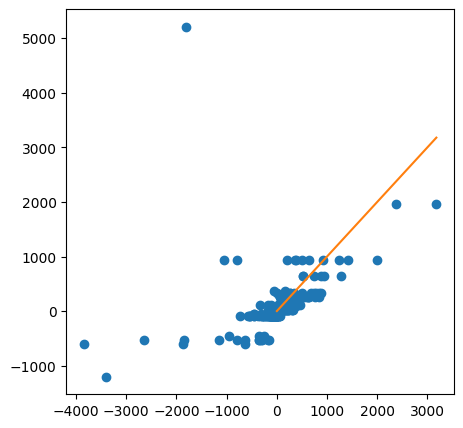

In [98]:
# encoded_oulier_df is encoded dataframe with outliers

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

x = encoded_oulier_df[[ 'Sales', 'Quantity', 'Discount', 'Category', 'SubCategory']]
y = encoded_oulier_df['Profit'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

dt = DecisionTreeRegressor(max_depth= 6, max_features= 7, min_samples_split= 10, random_state= 2)
param_grid = {"max_depth": [3, None,6,9],
              "max_features": [5, 7,11, 15],
              "min_samples_split": [2, 3, 10],
             "random_state":[2,4,6]}
grid = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5)
grid_result = grid.fit(x_train, y_train)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error

print("Train score: ",dt.score(x_train,y_train))
print("Test score: ",dt.score(x_test , y_test))
print('Regression score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute error:', mae)
print('Root Mean Squared Error:', rmse)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()

**Conclusions derived:**

We can observe that there was significant decrease in the model accuracy with outliers present in the dataset.

# **Overall Conclusion**

* Using feature selection techniques, the important predictor variables were:  'Sales', 'Quantity', 'Discount', 'Category', 'SubCategory'.
* All the predictor variables are independent of each other.
* The range of 'Sales' data is very high, this implies high variablity in it's distribution.
* Based on the DecisionTreeRegressor, the model can predict value with accuracy of 82.13%.
* There was significant decrease in the model accuracy with outliers present in the dataset.


**References :**

https://github.com/nikbearbrown

https://matplotlib.org/stable/

https://plotly.com/

https://seaborn.pydata.org/

https://scikit-learn.org/stable/

https://www.statsmodels.org/stable/index.html




---


MIT License

Copyright (c) [2023] [Muskan Raisinghani]

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS," WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.